In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv("Salary_dataset.csv")
dataset.head(30)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [5]:
dataset.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [6]:
dataset.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

<h3> select algorithm</h3>

In [7]:
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score # for the evaluation


<h3>feature selection</h3>

In [8]:
x=dataset[["YearsExperience"]] #covert into 2d becuse phle ye serirs me tha
type(x)

pandas.core.frame.DataFrame

In [9]:
y=dataset["Salary"]

<h3> data division into training and testing</h3>

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=42)
# giving test size =0.2 so that testing data me 20% gaya h baki traing me jaega
# random state =42 ka matlab hai koi bhi testing ki random 20% values le lenge
#,serial vise ni lenge

<h3> model preparation</h3

In [11]:
model_lr=LinearRegression()


<h3>model_fitting/traing</h3>

In [12]:
model_lr.fit(x_train,y_train) #model_trainig with labeled data


LinearRegression()

<h3> model evolution by prediction</h3>

In [13]:
model_lr.predict(x_test)

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

In [14]:
y_pred=model_lr.predict(x_test)


In [15]:
r2=r2_score(y_test,y_pred)

In [16]:
print("the r2 score of the model=",r2)

the r2 score of the model= 0.9024461774180498


<h3>user prediction from model</h3>

In [17]:
#  take input as exp
exp=float(input("enter years of experience"))
pred_salary=model_lr.predict([[exp]])#convert  exp into 2 dimention 
pred_salary

enter years of experience 3.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52651.64744857])

In [18]:
y_predict2=model_lr.predict(x_train,)


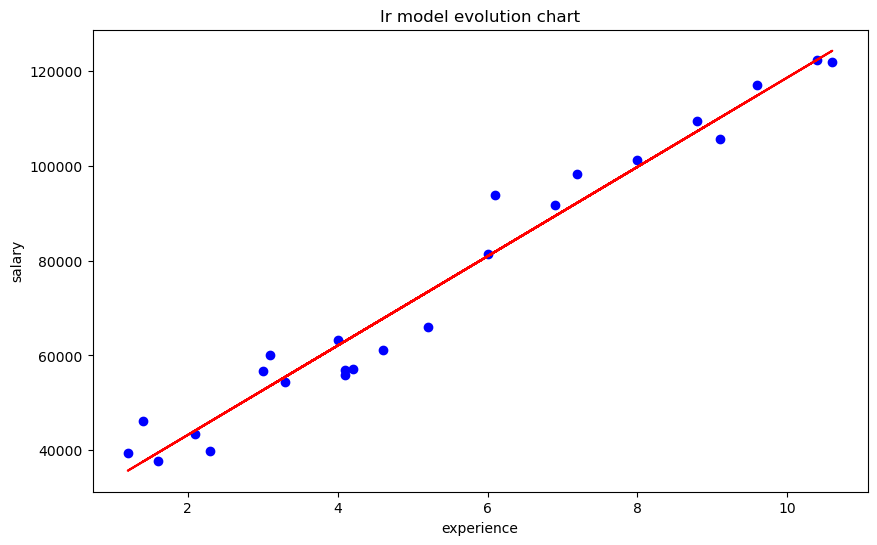

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x_train,y_train,color="blue",label="Training data")
plt.plot(x_train,y_predict2,color="red",label="lr_line")#line chart using variable
plt.xlabel("experience")
plt.ylabel("salary")
plt.title("lr model evolution chart")
plt.show()